In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("final_metric_stats.csv")
df.head()

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_male_18_24_enrolled_in_uni,p_female_18_24_enrolled_in_uni,p_male_18_24_has_grad_degree,p_female_18_24_has_grad_degree,p_female_given_thin_unmarried_20_24_not_enrolled,p_black_given_unmarried,p_asian_given_unmarried,p_white_given_unmarried,p_not_enrolled_given_20_24,p_female_thin_unmarried_20_24_not_enrolled
0,"Aberdeen, SD Micro Area",1520.0,904.0,391.0,53.0,536.0,739.0,1148.0,612.0,367.0,...,0.392956,0.395795,0.000000,0.002285,0.455595,0.046763,0.059493,0.804947,0.658869,0.261658
1,"Aberdeen, WA Micro Area",1952.0,1656.0,1133.0,36.0,505.0,761.0,1301.0,990.0,588.0,...,0.202899,0.237874,0.000000,0.000000,0.472003,0.019700,0.014950,0.819273,0.797222,0.285132
2,"Abilene, TX Metro Area",7241.0,3986.0,2673.0,1010.0,2434.0,2444.0,5633.0,2715.0,1260.0,...,0.335657,0.444170,0.002839,0.000856,0.509581,0.136252,0.017817,0.687428,0.642614,0.306709
3,"Ada, OK Micro Area",1368.0,847.0,455.0,122.0,509.0,639.0,1331.0,606.0,295.0,...,0.420624,0.550712,0.000000,0.003559,0.556127,0.050684,0.015361,0.575053,0.500158,0.338503
4,"Adrian, MI Micro Area",3007.0,2219.0,1456.0,235.0,715.0,1175.0,2638.0,1465.0,805.0,...,0.374664,0.469093,0.000000,0.017495,0.510421,0.053154,0.001802,0.875166,0.602836,0.290667


# Metric importance

1. p_unmarried_20_24_female (positive)
2. median_income_males_living_alone
2. m_f_income_ratio (negative - want lower male income and higher female income)
3. female obesity (negative - want low female obesity)
3. m_f obesity diff (positive - want higher male obesity and lower female obesity)
4. median rent (negative)
5. p_black (negative)

In [2]:
for col in df.columns:
    print(col)

area_name
n_unmarried_males_20_24
n_unmarried_males_25_29
n_unmarried_males_30_34
n_married_males_20_24
n_married_males_25_29
n_married_males_30_34
n_unmarried_females_20_24
n_unmarried_females_25_29
n_unmarried_females_30_34
n_married_females_20_24
n_married_females_25_29
n_married_females_30_34
n_males_18_24_middle_school_dropout
n_males_18_24_high_school_dropout
n_males_18_24_ged
n_males_18_24_college_dropout
n_males_18_24_associates
n_males_18_24_bachelors
n_males_18_24_grad
n_females_18_24_middle_school_dropout
n_females_18_24_high_school_dropout
n_females_18_24_ged
n_females_18_24_college_dropout
n_females_18_24_associates
n_females_18_24_bachelors
n_females_18_24_grad
n_households
n_white_households
n_black_households
n_amerindian_households
n_asian_households
n_islander_households
n_mixed_households
n_hispanic_households
median_income_males_living_alone
median_income_females_living_alone
p_male_disabled
p_female_disabled
p_white_disabled
p_black_disabled
p_amerindian_disabled
p

X is NOT EFFICIENT if for all utility fns U, there exists point Y != X
such that U(x) < U(Y). So regardless of weighting, X has a superior.

So X is efficient if there exists utility fn U st for all points Y != X, U(X) >= U(Y)

The convex efficient frontier should be a subset of my monotonic efficient frontier

Suppose X is a collection of points on the efficient frontier. I want to find y not in X
such that for some x in X, all points in the dataset lie on one side of the line btw x and y

-----
Okay so MEF is the monotonic efficient frontier. $CEF \subset MEF$. $X$ is the set of all cities, but I don't think I need to worry about that. I just want all points $a,b \in MEF$ st all points $c$ lie on or on one side of the line btw $a$ and $b$

$O(n^2)$ complexity is fine

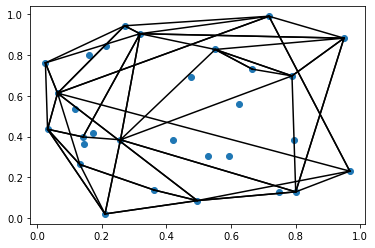

In [3]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
rng = np.random.default_rng()
points = rng.random((30, 3))   # 30 random points in 2-D
hull = ConvexHull(points)

import matplotlib.pyplot as plt

def plot_points(hull):
    points = hull.points
    plt.plot(points[:,0], points[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plot_points(hull)

In [4]:
hull.vertices

array([ 0,  1,  2,  3,  4,  5,  9, 13, 14, 15, 18, 20, 21, 23, 24, 25, 26,
       27], dtype=int32)

In [5]:
hull.vertices.shape, points.shape

((18,), (30, 3))

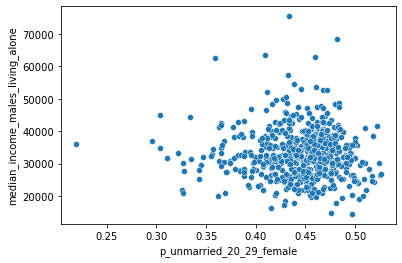

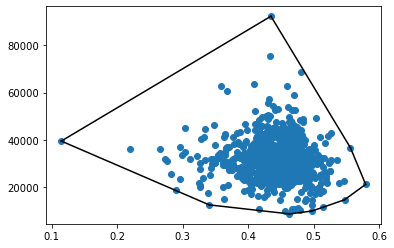

In [6]:
import seaborn as sns
sns.scatterplot(x="p_unmarried_20_29_female", y="median_income_males_living_alone", data=df.dropna())
plt.show()
hull = ConvexHull(df[["p_unmarried_20_29_female", "median_income_males_living_alone"]].dropna())
hull.points.shape, hull.vertices.shape
plot_points(hull)

In [7]:
df[["area_name", "p_unmarried_20_29_female", "median_income_males_living_alone"]].dropna().iloc[hull.vertices]

,area_name,p_unmarried_20_29_female,median_income_males_living_alone
497,"Los Alamos, NM Micro Area",0.434914,92337.0
831,"Susanville, CA Micro Area",0.114735,39438.0
704,"Raymondville, TX Micro Area",0.340699,12394.0
532,"Mayagüez, PR Metro Area",0.463251,8569.0
931,"Yauco, PR Metro Area",0.496965,9773.0
763,"Santa Isabel, PR Micro Area",0.514706,11411.0
167,"Clarksdale, MS Micro Area",0.547360,14570.0
370,"Helena-West Helena, AR Micro Area",0.579596,21082.0
42,"Atchison, KS Micro Area",0.556317,36620.0


9it [00:00, 337.95it/s]

5
Aguadilla-Isabela, PR Metro Area
759
San Juan-Bayamón-Caguas, PR Metro Area
293
Florence, SC Metro Area


,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_male_18_24_enrolled_in_uni,p_female_18_24_enrolled_in_uni,p_male_18_24_has_grad_degree,p_female_18_24_has_grad_degree,p_female_given_thin_unmarried_20_24_not_enrolled,p_black_given_unmarried,p_asian_given_unmarried,p_white_given_unmarried,p_not_enrolled_given_20_24,p_female_thin_unmarried_20_24_not_enrolled
5,"Aguadilla-Isabela, PR Metro Area",9685.0,7641.0,4949.0,182.0,1269.0,2411.0,8915.0,5658.0,3896.0,...,0.448582,0.571418,0.006300,0.000000,NaN,0.027263,0.000526,0.721876,0.512153,NaN
759,"San Juan-Bayamón-Caguas, PR Metro Area",70147.0,58260.0,37717.0,1629.0,7856.0,14951.0,67372.0,54626.0,36849.0,...,0.462230,0.562029,0.003194,0.003735,NaN,0.146692,0.001764,0.645600,0.511831,NaN
293,"Florence, SC Metro Area",5776.0,4360.0,2769.0,283.0,1662.0,2493.0,6065.0,4799.0,2936.0,...,0.313978,0.446802,0.001391,0.009356,0.58522,0.597249,0.006433,0.380834,0.636146,0.366717


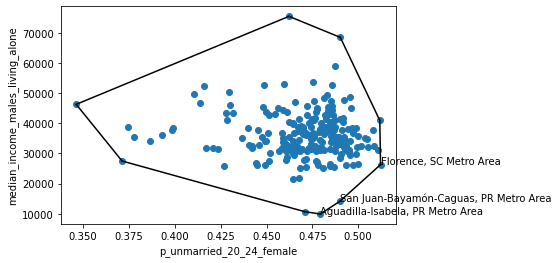

In [8]:
from tqdm import tqdm

def efficient_frontier_finder(df, metric_dict, plot_points=False):
    """
    a point X is on the efficient frontier if DNE point Y st
    (metric(X) <= metric(Y) for all metrics)
    i'm kind of extending the defn of "efficient frontier" in markowitz portfolio analysis
    """
    metric_items = metric_dict.items()
    metric_cols, metric_signs = list(zip(*metric_dict.items()))
    metric_cols = np.array(metric_cols)
    metric_signs = np.array(metric_signs, dtype=int)
    assert len(metric_cols) == len(metric_signs)
    efficient_inds = []
    
    hull = ConvexHull(df[metric_cols].dropna())
    hull_inds = hull.vertices
    hull_df = df[["area_name", *metric_cols]].dropna().iloc[hull_inds]
    
    for i, rowi in tqdm(hull_df.iterrows()):
        if not rowi[metric_cols].isnull().any():
            # find Y that is at least as good on all metrics
            metric_diffs = (hull_df[metric_cols] - rowi[metric_cols]) * metric_signs
            y_not_worse = (metric_diffs >= 0).all(axis=1)
            if y_not_worse.sum() == 1: # will always match w itself
                efficient_inds.append(i)
    if plot_points:
        fig, ax = plt.subplots()
        ax.plot(hull.points[:,0], hull.points[:,1], 'o')
        for simplex in hull.simplices:
            ax.plot(hull.points[simplex, 0], hull.points[simplex, 1], 'k-')
        for ind in efficient_inds:
            print(ind)
            print(hull_df["area_name"].loc[ind])
            ax.annotate(hull_df["area_name"].loc[ind], (hull_df.loc[ind][1:3]))
        plt.xlabel(metric_cols[0])
        plt.ylabel(metric_cols[1])
        
    return df.loc[hull_df.loc[efficient_inds].index]

            
efficient_points = efficient_frontier_finder(df.query("n_people >= 200000"), {"p_unmarried_20_24_female": 1, 
                                                  "median_income_males_living_alone":-1}, True)
efficient_points

In [9]:
df["log10_n_people"] = np.log10(df["n_people"])

In [10]:
trim_df = df.query("n_people > 150000")
# trim_df = df.query("n_people > 200000")

In [11]:
df["p_black"].loc[df.area_name.str.contains("Lauderdale")]

548    0.212404
973         NaN
Name: p_black, dtype: float64

In [12]:
trim_df = df.query("(n_people > 150000) & (p_black_given_unmarried <= 0.3) & (p_black <= 0.2)")
print(trim_df.shape)

metric_dict = {
    "p_female_given_thin_unmarried_20_24_not_enrolled": 1,
    "p_female_thin_unmarried_20_24_not_enrolled": 1,
#     "p_unmarried_20_24_female": 1,
    "median_income_males_living_alone": -1,
    "median_rent_1_bed": -1,
#     "percent_obese_fem": -1,
    #"log10_n_people": 1,
    #"p_black_given_unmarried": -1,
#     "p_not_enrolled_given_20_24": 1,
}
eff_df = efficient_frontier_finder(trim_df, metric_dict, plot_points=False)
print(eff_df.shape)
# eff_df.sort_values("p_unmarried_20_24_female", ascending=False)[["area_name", *extra_cols]]
eff_df.sort_values("p_unmarried_20_24_female", ascending=False)[["area_name", 
                                                                 "p_black_given_unmarried",
                                                                 "p_unmarried_20_24_female", 
                                                                 *list(metric_dict.keys())]]

(233, 141)


49it [00:00, 433.66it/s]

(23, 141)


,area_name,p_black_given_unmarried,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
423,"Johnson City, TN Metro Area",0.054201,0.496923,0.533129,0.332631,26287.0,569.0
737,"Saginaw, MI Metro Area",0.289886,0.491170,0.569520,0.337053,29612.0,535.0
722,"Rockford, IL Metro Area",0.194755,0.490376,0.569911,0.349149,34682.0,565.0
216,"Daphne-Fairhope-Foley, AL Metro Area",0.178167,0.490328,0.655536,0.442081,34180.0,784.0
316,"Gainesville, FL Metro Area",0.226059,0.486799,0.521663,0.353823,25382.0,799.0
272,"Eugene-Springfield, OR Metro Area",0.016672,0.484732,0.542764,0.366938,26546.0,735.0
772,"Scranton--Wilkes-Barre, PA Metro Area",0.074737,0.479819,0.530776,0.362738,32083.0,607.0
376,"Hilo, HI Micro Area",0.008314,0.477727,0.587172,0.408423,28295.0,873.0
775,"Sebastian-Vero Beach, FL Metro Area",0.162136,0.476064,0.548684,0.397811,32418.0,804.0
217,"Davenport-Moline-Rock Island, IA-IL Metro Area",0.142286,0.475408,0.548876,0.378519,35282.0,627.0


In [13]:
for place in ["Charlottesville", "Portland", "Eugene", "Tallahassee", "Gainesville", "New York"]:
    display(df[["area_name", "p_black_given_unmarried", "p_black",
                "p_unmarried_20_24_female", *list(metric_dict.keys())]].loc[df.area_name.str.contains(place)])

,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
159,"Charlottesville, VA Metro Area",0.157108,0.11998,0.511779,0.538252,0.403086,40966.0,981.0


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
685,"Portland-South Portland, ME Metro Area",0.033967,0.020522,0.481558,0.586720,0.429327,36883.0,840.0
686,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",0.041954,0.028352,0.481951,0.539473,0.367134,42792.0,1106.0


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
272,"Eugene-Springfield, OR Metro Area",0.016672,0.010886,0.484732,0.542764,0.366938,26546.0,735.0
956,"Eugene, OR Metro Area",NaN,NaN,NaN,NaN,NaN,NaN,NaN


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
836,"Tallahassee, FL Metro Area",0.428685,0.327292,0.510587,0.539966,0.383172,31061.0,838.0


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
316,"Gainesville, FL Metro Area",0.226059,0.178725,0.486799,0.521663,0.353823,25382.0,799.0
317,"Gainesville, GA Metro Area",0.111505,0.072206,0.464973,0.548024,0.344858,34724.0,810.0
318,"Gainesville, TX Micro Area",0.061582,0.028096,0.492080,0.384561,0.242108,35372.0,638.0


,area_name,p_black_given_unmarried,p_black,p_unmarried_20_24_female,p_female_given_thin_unmarried_20_24_not_enrolled,p_female_thin_unmarried_20_24_not_enrolled,median_income_males_living_alone,median_rent_1_bed
607,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",0.236501,0.173251,0.492352,0.52463,0.40922,47606.0,1319.0


In [14]:
df.loc[df.area_name.str.contains("Lauderdale")].p_black_given_unmarried

548    0.300804
973         NaN
Name: p_black_given_unmarried, dtype: float64

In [15]:
# unmarried_age_col = "p_unmarried_25_29_female"
unmarried_age_col = "p_unmarried_20_24_female"
# unmarried_age_col = "p_unmarried_20_29_female"

metric_dict = {
    unmarried_age_col: 1, # more unmarried women per unmarried men
    "median_income_males_living_alone": -1,
    #"median_income_females_living_alone": 1,
    #"m_f_income_ratio": -1,
    #"percent_obese_male": 1,
    "percent_obese_fem": -1,
    #"p_gay": 1,
    #"m_f_obesity_diff": 1,
    #"p_black": -1,
    "median_rent_1_bed": -1,
}

extra_cols = [
    unmarried_age_col, 
    "median_income_males_living_alone",
    "median_income_females_living_alone",
    "percent_obese_male",
    "percent_obese_fem",
    "p_black",
    "median_rent_1_bed",
    "p_gay",
    "n_people"
]

eff_df = efficient_frontier_finder(trim_df, metric_dict, plot_points=False)
print(eff_df.shape)
# eff_df.sort_values("p_unmarried_20_24_female", ascending=False)[["area_name", *extra_cols]]
eff_df.sort_values(unmarried_age_col, ascending=False)[["area_name", *extra_cols]]

52it [00:00, 354.77it/s]

(28, 141)


,area_name,p_unmarried_20_24_female,median_income_males_living_alone,median_income_females_living_alone,percent_obese_male,percent_obese_fem,p_black,median_rent_1_bed,p_gay,n_people
127,"Burlington, NC Metro Area",0.519306,29564.0,26561.0,35.0,37.0,0.195476,629.0,0.031292,163324.0
159,"Charlottesville, VA Metro Area",0.511779,40966.0,41024.0,20.6,21.9,0.119980,981.0,0.022727,215445.0
717,"Roanoke, VA Metro Area",0.508855,32366.0,27457.0,27.0,26.6,0.131798,649.0,0.023942,313009.0
897,"Waterloo-Cedar Falls, IA Metro Area",0.503621,36357.0,27026.0,35.6,36.1,0.075704,603.0,0.022819,169556.0
250,"Eau Claire, WI Metro Area",0.496991,36309.0,25794.0,28.1,26.7,0.013757,629.0,0.012141,167406.0
423,"Johnson City, TN Metro Area",0.496923,26287.0,21197.0,29.4,31.9,0.031512,569.0,0.014116,202049.0
104,"Boston-Cambridge-Newton, MA-NH Metro Area",0.495768,48581.0,35752.0,22.1,21.1,0.083332,1225.0,0.036654,4832346.0
128,"Burlington-South Burlington, VT Metro Area",0.494433,38003.0,34572.0,21.8,21.6,0.021775,970.0,0.011717,218784.0
607,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",0.492352,47606.0,33773.0,18.3,19.3,0.173251,1319.0,0.044307,19294236.0
737,"Saginaw, MI Metro Area",0.491170,29612.0,23994.0,35.7,38.6,0.185923,535.0,0.012867,191821.0


In [16]:
eff_df.loc[eff_df["area_name"].str.contains("FL"), ["area_name", *extra_cols]]

,area_name,p_unmarried_20_24_female,median_income_males_living_alone,median_income_females_living_alone,percent_obese_male,percent_obese_fem,p_black,median_rent_1_bed,p_gay,n_people
316,"Gainesville, FL Metro Area",0.486799,25382.0,25533.0,28.0,30.7,0.178725,799.0,0.039747,323799.0


In [40]:
eff_df.sort_values(unmarried_age_col, ascending=False)["area_name"]

127                           Burlington, NC Metro Area
159                      Charlottesville, VA Metro Area
717                              Roanoke, VA Metro Area
897                 Waterloo-Cedar Falls, IA Metro Area
250                           Eau Claire, WI Metro Area
423                         Johnson City, TN Metro Area
104           Boston-Cambridge-Newton, MA-NH Metro Area
128          Burlington-South Burlington, VT Metro Area
607    New York-Newark-Jersey City, NY-NJ-PA Metro Area
737                              Saginaw, MI Metro Area
722                             Rockford, IL Metro Area
316                          Gainesville, FL Metro Area
272                   Eugene-Springfield, OR Metro Area
376                                 Hilo, HI Micro Area
885                                 Waco, TX Metro Area
38                             Asheville, NC Metro Area
298                         Fort Collins, CO Metro Area
220                              Decatur, AL Met

In [18]:
def evaluate_area(area_name, metric_cols):
    vals = df.loc[df["area_name"] == area_name, metric_cols].iloc[0]
    #vals = df.query("area_name == '%s'".format(area_name))[metric_cols]
    for metric_col, val in zip(metric_cols, vals):
        p = (trim_df[metric_col] < val).mean()
        print("%s == %.3f \t\t higher than %.3f of big metro areas"%(metric_col, val, p))
foo = metric_dict.keys()
for area_name in [
    "Portland-Vancouver-Hillsboro, OR-WA Metro Area",
    "New York-Newark-Jersey City, NY-NJ-PA Metro Area",
    "Seattle-Tacoma-Bellevue, WA Metro Area",
    "San Francisco-Oakland-Berkeley, CA Metro Area",
    "San Jose-Sunnyvale-Santa Clara, CA Metro Area",
    "Charlottesville, VA Metro Area",
    "Tallahassee, FL Metro Area",
    "Chicago-Naperville-Elgin, IL-IN-WI Metro Area",
    
]:
    print(area_name, "----------------------")
    evaluate_area(area_name, foo)

Portland-Vancouver-Hillsboro, OR-WA Metro Area ----------------------
p_unmarried_20_24_female == 0.482 		 higher than 0.687 of big metro areas
median_income_males_living_alone == 42792.000 		 higher than 0.833 of big metro areas
p_black == 0.028 		 higher than 0.270 of big metro areas
median_rent_1_bed == 1106.000 		 higher than 0.910 of big metro areas
New York-Newark-Jersey City, NY-NJ-PA Metro Area ----------------------
p_unmarried_20_24_female == 0.492 		 higher than 0.888 of big metro areas
median_income_males_living_alone == 47606.000 		 higher than 0.944 of big metro areas
p_black == 0.173 		 higher than 0.953 of big metro areas
median_rent_1_bed == 1319.000 		 higher than 0.970 of big metro areas
Seattle-Tacoma-Bellevue, WA Metro Area ----------------------
p_unmarried_20_24_female == 0.460 		 higher than 0.275 of big metro areas
median_income_males_living_alone == 53164.000 		 higher than 0.983 of big metro areas
p_black == 0.058 		 higher than 0.468 of big metro areas
media

In [19]:
trim_df["p_unmarried_20_24_female"].describe()

count    233.000000
mean       0.466304
std        0.031934
min        0.180358
25%        0.458377
50%        0.473085
75%        0.485337
max        0.519306
Name: p_unmarried_20_24_female, dtype: float64

In [20]:
trim_df["p_black"].describe()

count    233.000000
mean       0.072234
std        0.052319
min        0.003140
25%        0.026227
50%        0.062210
75%        0.113476
max        0.199779
Name: p_black, dtype: float64

<AxesSubplot:xlabel='p_unmarried_20_24_female', ylabel='p_black'>

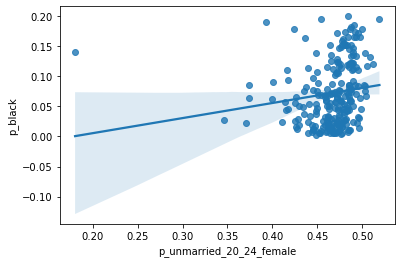

In [21]:
sns.regplot(x="p_unmarried_20_24_female", y="p_black", data=trim_df)

In [22]:
trim_df[extra_cols].median()

p_unmarried_20_24_female                   0.473085
median_income_males_living_alone       35476.000000
median_income_females_living_alone     27457.000000
percent_obese_male                        29.900000
percent_obese_fem                         30.600000
p_black                                    0.062210
median_rent_1_bed                        734.000000
p_gay                                      0.021309
n_people                              338356.000000
dtype: float64

In [23]:
trim_df.sort_values("p_white", ascending=False).iloc[0:30]

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_female_18_24_enrolled_in_uni,p_male_18_24_has_grad_degree,p_female_18_24_has_grad_degree,p_female_given_thin_unmarried_20_24_not_enrolled,p_black_given_unmarried,p_asian_given_unmarried,p_white_given_unmarried,p_not_enrolled_given_20_24,p_female_thin_unmarried_20_24_not_enrolled,log10_n_people
466,"Laredo, TX Metro Area",9871.0,5833.0,3607.0,626.0,2935.0,3979.0,8981.0,4390.0,3069.0,...,0.425754,0.002536,0.002191,0.542911,0.006126,0.005466,0.958753,0.619848,0.363118,5.436999
444,"Kingsport-Bristol, TN-VA Metro Area",7260.0,4929.0,2673.0,924.0,3262.0,4192.0,5798.0,3757.0,1920.0,...,0.392164,0.003410,0.007998,0.552010,0.041666,0.007553,0.905095,0.708305,0.302043,5.486496
391,"Huntington-Ashland, WV-KY-OH Metro Area",10841.0,6899.0,4252.0,871.0,3199.0,4562.0,9677.0,5212.0,2850.0,...,0.491777,0.003040,0.004761,0.571794,0.046711,0.006176,0.909743,0.597335,0.329941,5.558507
60,"Bangor, ME Metro Area",5434.0,3882.0,2163.0,193.0,1353.0,2261.0,4516.0,3111.0,1733.0,...,0.649838,0.007117,0.006632,0.479888,0.020570,0.015766,0.909584,0.417338,0.296144,5.181197
476,"Lebanon, NH-VT Micro Area",6801.0,4949.0,3051.0,296.0,1102.0,2802.0,5951.0,4191.0,2331.0,...,0.442989,0.007815,0.008935,0.446118,0.019352,0.033416,0.910016,0.644613,0.310841,5.336588
120,"Brownsville-Harlingen, TX Metro Area",13480.0,8043.0,4135.0,1989.0,4319.0,6521.0,11688.0,6231.0,3987.0,...,0.319622,0.001468,0.003577,0.505066,0.007655,0.005112,0.946022,0.692109,0.262790,5.624969
334,"Grand Junction, CO Metro Area",4150.0,3555.0,1549.0,473.0,1201.0,2947.0,3901.0,1835.0,1396.0,...,0.471884,0.000000,0.005652,0.535098,0.011635,0.009851,0.915655,0.589581,0.336664,5.179603
178,"Coeur d'Alene, ID Metro Area",4080.0,2768.0,2236.0,303.0,1728.0,1999.0,3315.0,2130.0,1154.0,...,0.294674,0.000000,0.000000,0.509859,0.005680,0.011553,0.905557,0.727094,0.319449,5.196789
685,"Portland-South Portland, ME Metro Area",14829.0,12594.0,6808.0,566.0,3201.0,8438.0,13774.0,10635.0,5603.0,...,0.493480,0.006738,0.012005,0.586720,0.033967,0.017591,0.911963,0.595260,0.429327,5.725973
81,"Bend, OR Metro Area",4470.0,4066.0,2710.0,142.0,1548.0,2873.0,3707.0,3061.0,1999.0,...,0.268107,0.000000,0.007470,0.482464,0.015158,0.014754,0.902912,0.740083,0.340867,5.270099


In [24]:
pr_df = df.query("(n_people > 100000)")
pr_df = pr_df.loc[pr_df["area_name"].str.contains(", PR")]
pr_df
# efficient_frontier_finder(pr_df, metric_cols, metric_signs).sort_values("p_unmarried_20_24_female", ascending=False)

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_female_18_24_enrolled_in_uni,p_male_18_24_has_grad_degree,p_female_18_24_has_grad_degree,p_female_given_thin_unmarried_20_24_not_enrolled,p_black_given_unmarried,p_asian_given_unmarried,p_white_given_unmarried,p_not_enrolled_given_20_24,p_female_thin_unmarried_20_24_not_enrolled,log10_n_people
5,"Aguadilla-Isabela, PR Metro Area",9685.0,7641.0,4949.0,182.0,1269.0,2411.0,8915.0,5658.0,3896.0,...,0.571418,0.006300,0.000000,NaN,0.027263,0.000526,0.721876,0.512153,NaN,5.478721
36,"Arecibo, PR Metro Area",5934.0,4376.0,2906.0,228.0,1363.0,1241.0,5094.0,4031.0,1984.0,...,0.550812,0.001131,0.005171,NaN,0.030913,0.004343,0.840205,0.536048,NaN,5.256638
680,"Ponce, PR Metro Area",8239.0,6567.0,4216.0,244.0,956.0,1352.0,7328.0,5662.0,3897.0,...,0.565138,0.000000,0.014404,NaN,0.060223,0.000752,0.654691,0.522219,NaN,5.354333
757,"San Germán, PR Metro Area",4436.0,2700.0,2165.0,136.0,390.0,708.0,3856.0,2722.0,2074.0,...,0.485585,0.000000,0.000000,NaN,0.013245,0.000000,0.376517,0.582138,NaN,5.098034
759,"San Juan-Bayamón-Caguas, PR Metro Area",70147.0,58260.0,37717.0,1629.0,7856.0,14951.0,67372.0,54626.0,36849.0,...,0.562029,0.003194,0.003735,NaN,0.146692,0.001764,0.645600,0.511831,NaN,6.322262


In [25]:
df.query("(n_people > 150000) & (p_unmarried_20_24_female > 0.49)")\
.sort_values("m_f_income_ratio", ascending=True)\
[["area_name"] + extra_cols].head(20)

,area_name,p_unmarried_20_24_female,median_income_males_living_alone,median_income_females_living_alone,percent_obese_male,percent_obese_fem,p_black,median_rent_1_bed,p_gay,n_people
159,"Charlottesville, VA Metro Area",0.511779,40966.0,41024.0,20.6,21.9,0.119980,981.0,0.022727,215445.0
836,"Tallahassee, FL Metro Area",0.510587,31061.0,29631.0,24.9,27.2,0.327292,838.0,0.023835,382197.0
183,"Columbia, MO Metro Area",0.501597,32500.0,30468.0,28.3,28.8,0.085597,641.0,0.037932,205369.0
347,"Greenville, NC Metro Area",0.536663,26755.0,24608.0,34.6,36.9,0.347043,614.0,0.012322,178433.0
506,"Macon-Bibb County, GA Metro Area",0.499856,26360.0,24057.0,31.6,36.6,0.448733,665.0,0.007903,229504.0
128,"Burlington-South Burlington, VT Metro Area",0.494433,38003.0,34572.0,21.8,21.6,0.021775,970.0,0.011717,218784.0
127,"Burlington, NC Metro Area",0.519306,29564.0,26561.0,35.0,37.0,0.195476,629.0,0.031292,163324.0
401,"Iowa City, IA Metro Area",0.498215,33904.0,30302.0,24.7,25.4,0.064373,772.0,0.029163,170677.0
429,"Kalamazoo-Portage, MI Metro Area",0.495796,34244.0,30332.0,33.0,33.0,0.111191,692.0,0.016680,262745.0
245,"Durham-Chapel Hill, NC Metro Area",0.508217,37840.0,33236.0,29.5,34.3,0.265609,895.0,0.031042,626695.0


In [26]:
df["p_cuban"] = df["n_cuban"] / df["n_people"]
df.sort_values("p_cuban", ascending=False)\
[["area_name", *extra_cols]].iloc[0:20]

,area_name,p_unmarried_20_24_female,median_income_males_living_alone,median_income_females_living_alone,percent_obese_male,percent_obese_fem,p_black,median_rent_1_bed,p_gay,n_people
548,"Miami-Fort Lauderdale-Pompano Beach, FL Metro ...",0.479529,37430.0,26324.0,25.1,27.8,0.212404,1102.0,NaN,6090660.0
441,"Key West, FL Micro Area",0.391529,42328.0,30936.0,28.1,25.3,0.073155,1312.0,0.046309,75798.0
173,"Clewiston, FL Micro Area",0.423952,21710.0,18802.0,39.3,39.5,0.115094,553.0,0.041270,40732.0
593,"Naples-Marco Island, FL Metro Area",0.454591,43254.0,35803.0,21.1,19.5,0.068391,1092.0,NaN,371453.0
139,"Cape Coral-Fort Myers, FL Metro Area",0.485443,35788.0,30056.0,26.6,25.4,0.085810,899.0,0.024601,737468.0
837,"Tampa-St. Petersburg-Clearwater, FL Metro Area",0.487046,34186.0,28119.0,26.9,27.4,0.122093,918.0,0.041284,3097859.0
776,"Sebring-Avon Park, FL Metro Area",0.431927,26170.0,22168.0,26.8,28.7,0.096552,571.0,NaN,103437.0
633,"Orlando-Kissimmee-Sanford, FL Metro Area",0.497227,36924.0,28597.0,31.3,32.1,0.165791,1019.0,0.041526,2508970.0
624,"Okeechobee, FL Micro Area",0.420913,23237.0,20992.0,31.7,31.3,0.082977,542.0,0.000000,41144.0
188,"Columbus, NE Micro Area",0.471580,37746.0,28109.0,36.8,35.3,0.005396,605.0,0.000000,33174.0


In [27]:
df.loc[df.area_name.str.contains("Chicago")]

,area_name,n_unmarried_males_20_24,n_unmarried_males_25_29,n_unmarried_males_30_34,n_married_males_20_24,n_married_males_25_29,n_married_males_30_34,n_unmarried_females_20_24,n_unmarried_females_25_29,n_unmarried_females_30_34,...,p_female_18_24_enrolled_in_uni,p_male_18_24_has_grad_degree,p_female_18_24_has_grad_degree,p_female_given_thin_unmarried_20_24_not_enrolled,p_black_given_unmarried,p_asian_given_unmarried,p_white_given_unmarried,p_not_enrolled_given_20_24,p_female_thin_unmarried_20_24_not_enrolled,log10_n_people
162,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",302011.0,271025.0,169599.0,8923.0,60875.0,143652.0,283184.0,236510.0,137842.0,...,0.457622,0.008451,0.012361,0.516755,0.240242,0.052523,0.577441,0.579511,0.362692,6.978117


In [28]:
df.loc[df.area_name.str.contains("Chicago"), ["area_name"]+extra_cols]

,area_name,p_unmarried_20_24_female,median_income_males_living_alone,median_income_females_living_alone,percent_obese_male,percent_obese_fem,p_black,median_rent_1_bed,p_gay,n_people
162,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",0.483914,43551.0,32985.0,25.2,27.5,0.16553,966.0,0.035946,9508605.0


In [29]:
df.area_name.isin(eff_df.area_name).rename("foo")

0       False
1       False
2       False
3       False
4       False
        ...  
1000    False
1001    False
1002    False
1003    False
1004    False
Name: foo, Length: 1005, dtype: bool

Text(0.5, 1.0, 'Male income vs female obesity rates')

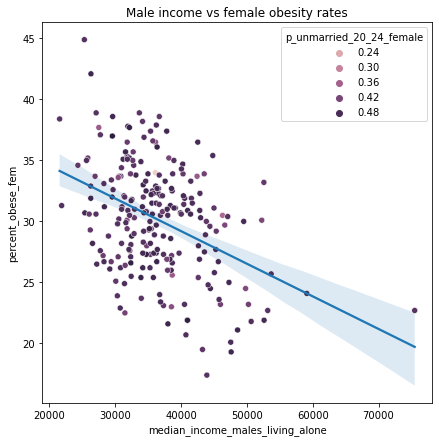

In [30]:
f, ax = plt.subplots(figsize=(7, 7))
# ax.set(xscale="log")

sns.regplot(x="median_income_males_living_alone", y="percent_obese_fem",
            ax=ax,
            #hue=df.area_name.str.contains("Brownsville"), 
            scatter=False,
            data=trim_df)
sns.scatterplot(x="median_income_males_living_alone", y="percent_obese_fem", 
                hue="p_unmarried_20_24_female",
                ax=ax,
            #hue=df.area_name.str.contains("Brownsville"), 
                #style=df.area_name.isin(eff_df.area_name).rename("is_efficient"),
            data=trim_df)
plt.title("Male income vs female obesity rates")
#              data=trim_df.loc[trim_df.area_name.str.endswith("TX Metro Area")])

In [31]:
trim_df["median_income_males_living_alone"].describe()

count      233.000000
mean     35922.304721
std       7653.384538
min       9925.000000
25%      31614.000000
50%      35476.000000
75%      40028.000000
max      75489.000000
Name: median_income_males_living_alone, dtype: float64

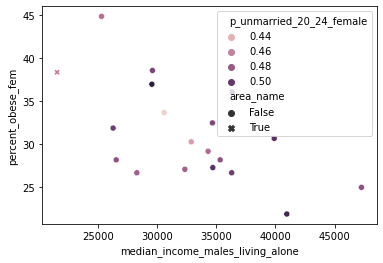

In [32]:
sns.scatterplot(x="median_income_males_living_alone", y="percent_obese_fem", 
                hue="p_unmarried_20_24_female",
                style=eff_df["area_name"].str.contains("Brownsville"),
            data=eff_df)
# sns.regplot(x="median_income_males_living_alone", y="percent_obese_fem", 
#             #hue=df.area_name.str.contains("Brownsville"), 
#             scatter=False,
#             data=trim_df)
plt.show()

In [33]:
trim_df.loc[trim_df.area_name.str.contains("TX Metro Area"), ["area_name"] + extra_cols].sort_values("p_unmarried_20_24_female")

,area_name,p_unmarried_20_24_female,median_income_males_living_alone,median_income_females_living_alone,percent_obese_male,percent_obese_fem,p_black,median_rent_1_bed,p_gay,n_people
912,"Wichita Falls, TX Metro Area",0.400982,30454.0,22048.0,31.8,33.6,0.091285,620.0,0.009722,150715.0
495,"Longview, TX Metro Area",0.423633,31473.0,23222.0,21.7,22.5,0.178767,682.0,0.017621,284796.0
2,"Abilene, TX Metro Area",0.437549,28152.0,23629.0,26.1,27.2,0.081802,683.0,0.016076,170669.0
264,"El Paso, TX Metro Area",0.442184,31803.0,20017.0,31.5,29.4,0.033273,657.0,0.021777,840477.0
620,"Odessa, TX Metro Area",0.449405,42609.0,24663.0,26.3,25.4,0.047964,820.0,0.031250,160579.0
751,"San Antonio-New Braunfels, TX Metro Area",0.458547,36678.0,30399.0,33.6,31.4,0.068169,860.0,0.032326,2468193.0
24,"Amarillo, TX Metro Area",0.459473,33956.0,27126.0,23.9,23.7,0.060070,678.0,0.012579,263776.0
500,"Lubbock, TX Metro Area",0.460705,30959.0,26449.0,28.1,28.2,0.068113,733.0,0.029696,316474.0
181,"College Station-Bryan, TX Metro Area",0.461099,28966.0,24937.0,27.6,28.8,0.115010,796.0,0.019478,258029.0
198,"Corpus Christi, TX Metro Area",0.462426,35365.0,21922.0,37.8,37.4,0.034332,829.0,0.028658,428548.0
